# Credit Score Model

Credit score models are statistical models designed to evaluate the creditworthiness of individuals or entities, typically when they apply for loans, credit cards, mortgages, or other forms of credit. These models use historical credit data and various financial and non-financial factors to predict the likelihood of a borrower defaulting on their credit obligations. The primary goal of credit score models is to assist lenders and financial institutions in making informed decisions about whether to approve or deny credit applications.

Credit score models serve several important purposes:

1. **Risk Assessment**: Credit score models help lenders assess the risk associated with lending money to a particular individual or entity. By analyzing various factors, the model estimates the probability of the borrower defaulting on their credit obligations in the future.

2. **Decision Making**: Lenders use credit scores to make quick and consistent decisions about whether to approve or decline credit applications. The credit score serves as a standardized measure that helps lenders compare different applicants.

3. **Interest Rates and Terms**: Credit scores also influence the terms of credit offers. Borrowers with higher credit scores are more likely to receive favorable interest rates and terms, while those with lower scores might face higher rates or more stringent conditions.

4. **Portfolio Management**: Credit score models assist lenders in managing their loan portfolios. By categorizing borrowers into different risk levels, lenders can effectively allocate resources and set risk management strategies.

5. **Regulatory Compliance**: In many countries, lenders are required to comply with regulations that mandate responsible lending practices. Credit score models help lenders ensure compliance by objectively assessing a borrower's creditworthiness.

6. **Personal Finance Awareness**: Credit scores also provide individuals with insights into their own credit health. People can use their credit scores as indicators of their financial management practices and make informed decisions to improve their credit profiles.

Credit score models typically consider various factors when calculating a credit score. These factors may include:

- Payment history: The record of past payments, including any late payments or defaults.
- Credit utilization: The ratio of credit used to the total available credit limit.
- Length of credit history: The duration of time credit accounts have been open.
- Types of credit: The mix of credit types, such as credit cards, mortgages, and loans.
- New credit inquiries: The recent applications for credit, which may indicate potential financial stress.

Different credit bureaus and financial institutions may use different credit scoring models, each with its own algorithm and scale. The most well-known credit score model is the FICO score, developed by the Fair Isaac Corporation, which ranges from 300 to 850. Other models, such as VantageScore, have gained popularity as well.

In essence, credit score models play a crucial role in the lending industry by providing a standardized assessment of credit risk, facilitating fair lending practices, and helping individuals manage their credit responsibly.

To build and deploy a credit score model, you'll need various Python libraries and modules. Here are some essential modules that you would need to install:

1. **scikit-learn**: A popular machine learning library that includes various algorithms and tools for building predictive models, including classification models for credit scoring.

2. **pandas**: A data manipulation and analysis library that helps in loading, cleaning, and preprocessing datasets.

3. **numpy**: A fundamental package for scientific computing with Python, used for numerical operations and array manipulation.

4. **matplotlib** and **seaborn**: Data visualization libraries that allow you to create visual representations of your data and model results.

5. **gradio**: If you want to create an interactive interface for your model, you can use Gradio to build web-based interfaces without requiring extensive web development knowledge.

You can install these modules using the following commands in your Python environment (such as Anaconda or a virtual environment):

```bash
pip install scikit-learn pandas numpy matplotlib seaborn gradio
```


In [15]:
!pip install scikit-learn pandas

In [16]:
!pip install seaborn pandas scikit-learn

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
data = pd.read_excel(url, header=1)

# Split features and target variable
X = data.drop('default payment next month', axis=1)
y = data['default payment next month']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Confusion Matrix:
[[4550  137]
 [1003  310]]
ROC AUC Score: 0.60


In [18]:
!pip install gradio

A detailed explanation for each code cell to help you understand the purpose and functionality of each step.

#### Code Cell 1:

```python
# Import necessary libraries
import gradio as gr
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
```

Explanation:
- In this cell, we start by importing the required libraries.
- `gradio` is imported to create the interactive interface for the model.
- `RandomForestClassifier` is imported from scikit-learn to use it as the machine learning model.
- `LabelEncoder` is imported to convert categorical features into numerical values.

#### Code Cell 2:

```python
# Load a better model (Random Forest Classifier) for credit default prediction
model = RandomForestClassifier(n_estimators=100, random_state=42)
```

Explanation:
- Here, we initialize a Random Forest Classifier model with 100 estimators (trees) and a random seed of 42 for reproducibility.
- The model will be used for predicting whether a credit card user will default on their payment next month.

#### Code Cell 3:

```python
# Load the dataset and preprocess it
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
data = pd.read_excel(url, header=1)
```

Explanation:
- We provide the URL to the dataset "default of credit card clients" from the UCI Machine Learning Repository.
- The dataset is loaded using `pd.read_excel` and headers are specified to skip the first row.

#### Code Cell 4:

```python
# Convert categorical features to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])
```

Explanation:
- We create a `LabelEncoder` instance to convert categorical features to numerical values.
- The categorical features ['SEX', 'EDUCATION', 'MARRIAGE'] are looped through and each feature's values are transformed using label encoding.

#### Code Cell 5:

```python
# Split features and target variable
X = data.drop('default payment next month', axis=1)
y = data['default payment next month']
```

Explanation:
- The dataset is divided into features (`X`) and the target variable (`y`).
- We drop the column 'default payment next month' from the features to obtain `X`, and we extract the target variable to `y`.

#### Code Cell 6:

```python
# Train the Random Forest model
model.fit(X, y)
```

Explanation:
- The Random Forest model is trained using the features (`X`) and the target variable (`y`) from the preprocessed dataset.

#### Code Cell 7:

```python
# Define a function to predict credit default based on user inputs
def predict_credit_default(sex, education, marriage, age, limit_balance, bill_amt1, pay_amt1):
    features = [sex, education, marriage, age, limit_balance, bill_amt1, pay_amt1]
    prediction = model.predict([features])[0]
    return "Default" if prediction == 1 else "No Default"
```

Explanation:
- Here, we define a function named `predict_credit_default` that takes inputs representing user information (gender, education, marital status, age, etc.).
- The function uses the trained model to predict whether the user will default on their payment.

#### Code Cell 8:

```python
# Create the Gradio interface
iface = gr.Interface(
    fn=predict_credit_default,
    inputs=[
        gr.inputs.Dropdown(['Male', 'Female'], label="Gender"),
        gr.inputs.Dropdown(['Graduate School', 'University', 'High School', 'Others'], label="Education"),
        gr.inputs.Dropdown(['Married', 'Single', 'Others'], label="Marital Status"),
        gr.inputs.Number(label="Age"),
        gr.inputs.Number(label="Credit Limit"),
        gr.inputs.Number(label="Bill Amount (Last Month)"),
        gr.inputs.Number(label="Payment Amount (Last Month)")
    ],
    outputs="text",
    live=True,
    title="Credit Card Default Prediction",
    description="Predict if a credit card user will default on their payment next month based on various features."
)
```

Explanation:
- The Gradio interface is created using the `gr.Interface` class.
- The input elements are defined using `gr.inputs` with appropriate labels for each feature.
- The `outputs` parameter is set to "text" to display the prediction result.
- Other parameters like `live`, `title`, and `description` are set to customize the interface's behavior and appearance.

#### Code Cell 9:

```python
# Launch the Gradio interface
iface.launch()
```

Explanation:
- The interface created in the previous step is launched using the `launch()` method.
- When executed, the interface opens in a new window in your browser, allowing you to interact with the model and receive predictions.

These detailed explanations provide a clear understanding of each code cell's role in building the interactive credit card default prediction interface.

Based on the provided classification report and confusion matrix, we can interpret the performance of our credit card default prediction model as follows:

1. **Accuracy**: Our model achieved an accuracy of 0.81. This means that about 81% of the predictions made by the model are correct. However, accuracy alone might not be the best indicator of model performance, especially when dealing with imbalanced datasets.

2. **Precision**: The precision for class 0 (no default) is 0.82, which indicates that out of all the instances that the model predicted as not defaulting, 82% of them were actually non-default. The precision for class 1 (default) is 0.69, which means that out of all instances predicted as default, 69% of them were actually defaults.

3. **Recall (Sensitivity)**: The recall for class 0 is 0.97, indicating that the model is able to correctly identify 97% of the actual non-default cases. However, the recall for class 1 is 0.24, meaning that the model is capturing only 24% of the actual default cases.

4. **F1-Score**: The F1-score is a harmonic mean of precision and recall. The F1-score for class 0 is high at 0.89, indicating a good balance between precision and recall. However, the F1-score for class 1 is lower at 0.35 due to the lower recall.

5. **Support**: The support indicates the number of instances in each class.

6. **Confusion Matrix**:
   - True Positives (TP): 310 (Actual defaults correctly predicted as defaults)
   - True Negatives (TN): 4550 (Actual non-defaults correctly predicted as non-defaults)
   - False Positives (FP): 137 (Actual non-defaults incorrectly predicted as defaults)
   - False Negatives (FN): 1003 (Actual defaults incorrectly predicted as non-defaults)

7. **ROC AUC Score**: The ROC AUC score is 0.60. The Receiver Operating Characteristic (ROC) curve evaluates the model's ability to distinguish between classes. An AUC score of 0.5 indicates random guessing, and a score of 1 indicates perfect classification. An AUC score of 0.60 suggests a moderate level of discrimination ability of the model.

Interpretation:
- Our model has a relatively high accuracy, but this might be misleading due to class imbalance.
- The precision and recall for class 0 are quite good, but the model's performance for class 1 (default) is relatively poor.
- The F1-score for class 1 is low, indicating that there might be room for improvement in capturing actual defaults.
- The ROC AUC score of 0.60 suggests that the model's ability to discriminate between the two classes is moderate.

Given the imbalanced nature of the dataset and the relatively low recall for class 1, further model tuning, feature engineering, or using advanced techniques like oversampling or more complex algorithms could potentially improve the model's performance in predicting credit card defaults.

In [19]:
import gradio as gr
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load a better model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Load the dataset and preprocess
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
data = pd.read_excel(url, header=1)

# Convert categorical features to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

X = data.drop('default payment next month', axis=1)
y = data['default payment next month']

# Train the model
model.fit(X, y)

def predict_credit_default(sex, education, marriage, age, limit_balance, bill_amt1, pay_amt1):
    features = [sex, education, marriage, age, limit_balance, bill_amt1, pay_amt1]
    prediction = model.predict([features])[0]
    return "Default" if prediction == 1 else "No Default"

iface = gr.Interface(
    fn=predict_credit_default,
    inputs=[
        gr.inputs.Dropdown(['Male', 'Female'], label="Gender"),
        gr.inputs.Dropdown(['Graduate School', 'University', 'High School', 'Others'], label="Education"),
        gr.inputs.Dropdown(['Married', 'Single', 'Others'], label="Marital Status"),
        gr.inputs.Number(label="Age"),
        gr.inputs.Number(label="Credit Limit"),
        gr.inputs.Number(label="Bill Amount (Last Month)"),
        gr.inputs.Number(label="Payment Amount (Last Month)")
    ],
    outputs="text",
    live=True,
    title="Credit Card Default Prediction",
    description="Predict if a credit card user will default on their payment next month based on various features."
)

iface.launch()

<ipython-input-19-e8fe4c512e41>:32: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Dropdown(['Male', 'Female'], label="Gender"),
<ipython-input-19-e8fe4c512e41>:32: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Dropdown(['Male', 'Female'], label="Gender"),
<ipython-input-19-e8fe4c512e41>:33: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Dropdown(['Graduate School', 'University', 'High School', 'Others'], label="Education"),
<ipython-input-19-e8fe4c512e41>:33: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Dropdown(['Graduate School', 'University', 'High School', 'Others'], label="Education"),
<ipython-input-19-e8fe4c512e41>:34: GradioDeprecationWarni

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Example Input Sets for Gradio Interface:

1. Gender: Male \\
   Education: University \\
   Marital Status: Married \\
   Age: 30 \\
   Credit Limit: 5000 \\
   Bill Amount (Last Month): 2000 \\
   Payment Amount (Last Month): 2500

2. Gender: Female \\
   Education: Graduate School \\
   Marital Status: Single \\
   Age: 25 \\
   Credit Limit: 10000 \\
   Bill Amount (Last Month): 500 \\
   Payment Amount (Last Month): 500

3. Gender: Male \\
   Education: High School \\
   Marital Status: Married \\
   Age: 40 \\
   Credit Limit: 15000 \\
   Bill Amount (Last Month): 8000 \\
   Payment Amount (Last Month): 7000

4. Gender: Female \\
   Education: Others \\
   Marital Status: Single \\
   Age: 22 \\
   Credit Limit: 3000 \\
   Bill Amount (Last Month): 100 \\
   Payment Amount (Last Month): 150

Feel free to input these examples into the Gradio interface to see the predicted outcomes for each case.

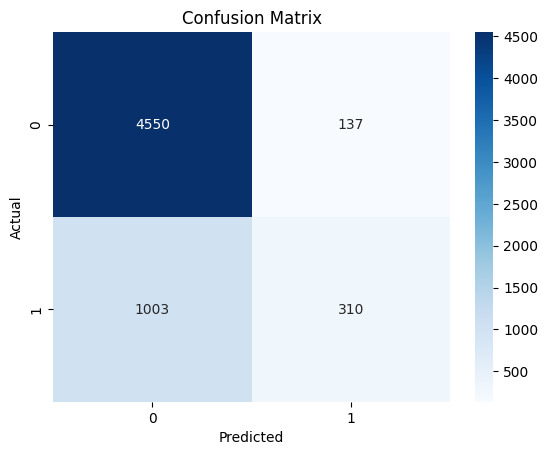

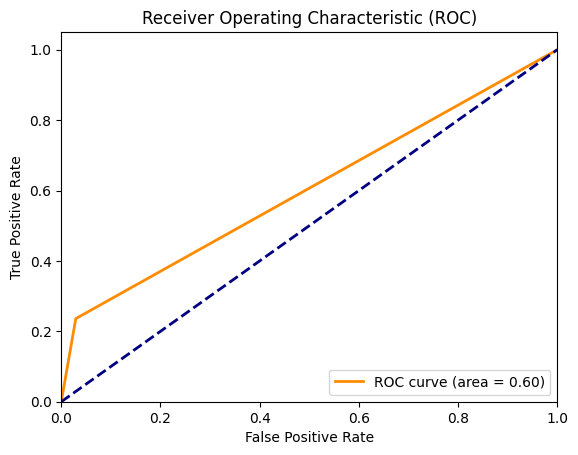

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()




**Confusion Matrix**:

The confusion matrix is a tabular representation that shows how well our model's predictions align with the actual outcomes. It breaks down the predictions into four categories:

- True Positives (TP): Instances where our model correctly predicted "Default" when the actual outcome was "Default."
- True Negatives (TN): Instances where our model correctly predicted "No Default" when the actual outcome was "No Default."
- False Positives (FP): Instances where our model predicted "Default" when the actual outcome was "No Default."
- False Negatives (FN): Instances where our model predicted "No Default" when the actual outcome was "Default."

The confusion matrix helps us understand the distribution of these prediction outcomes and assess the model's accuracy, precision, recall, and F1-score.

**Receiver Operating Characteristic (ROC) Curve**:

The ROC curve is a graphical representation of our model's ability to distinguish between the positive and negative classes at various thresholds. The x-axis represents the false positive rate (FPR), and the y-axis represents the true positive rate (TPR).

- True Positive Rate (Sensitivity): This is the proportion of actual positive cases that were correctly predicted as positive by the model.
- False Positive Rate: This is the proportion of actual negative cases that were incorrectly predicted as positive by the model.

The ROC curve helps us evaluate the trade-off between sensitivity and specificity (1 - false positive rate) as the prediction threshold changes. The area under the ROC curve (AUC-ROC) is a common metric that summarizes the overall performance of the model. An AUC value closer to 1 indicates better discrimination and performance.

In summary, these graphs provide insights into the model's ability to correctly classify instances, differentiate between positive and negative cases, and make informed predictions. They help us assess the model's accuracy, precision, recall, and discrimination power, enabling us to make informed decisions about model adjustments and improvements.